### Import libraries and data

In [549]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from scipy import stats

In [494]:
fp = np.load('ps3_genetic_fingerprints.npy')

In [495]:
pt = np.load('ps3_patient_zet.npy')

#### Sum of squared distances

In [496]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(fp)
    Sum_of_squared_distances.append(km.inertia_)

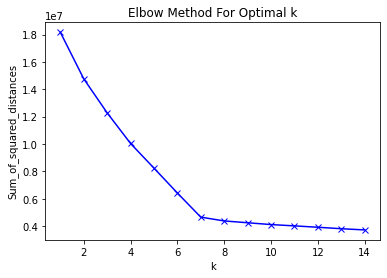

In [497]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhouette score

In [501]:
sil_score = list()

K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(fp)
    kl = range(k)
    label = km.predict(fp)
    sil_score.append(silhouette_score(fp, km.labels_))

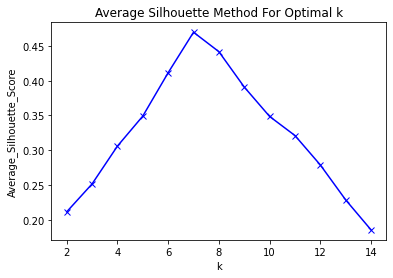

In [502]:
plt.plot(K, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Average_Silhouette_Score')
plt.title('Average Silhouette Method For Optimal k')
plt.show()

#### Silhouette Score Visualization

In [503]:
#Combine the fingerprint dataset and the patient Z row together
combined = np.vstack([fp,pt])

In [504]:
#Transform the 512 dimensions vectors to 2 dimensions vectors by applying PCA
combined_pca = pca.fit_transform(combined)

In [520]:
pca = PCA(n_components=2, svd_solver='auto')

For n_clusters = 6 The average silhouette_score is : 0.411579
   label  silhouette_score
0      0          0.506655
1      1          0.236839
2      2          0.494335
3      3          0.484175
4      4          0.461968
5      5          0.461039
The patient Z lies in class 4
There are 2418 people in this class.


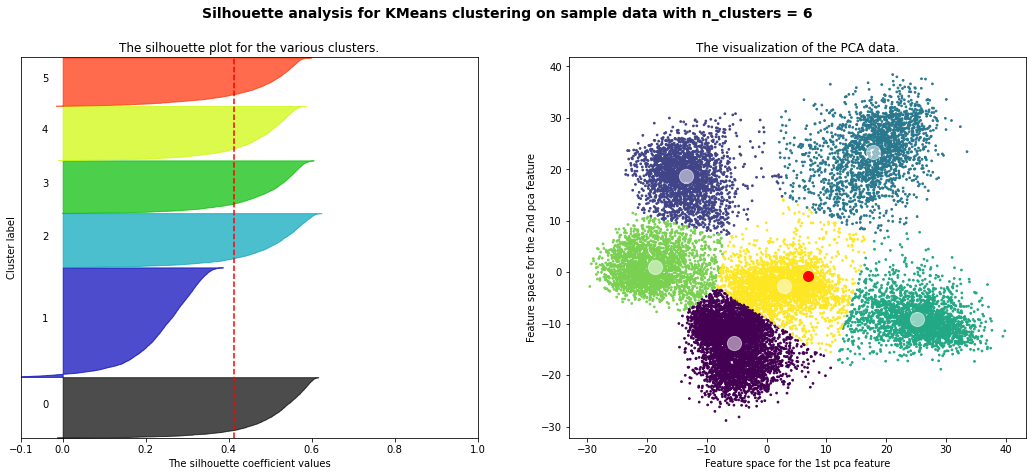

For n_clusters = 7 The average silhouette_score is : 0.46984223
   label  silhouette_score
0      0          0.493279
1      1          0.508090
2      2          0.494570
3      3          0.480217
4      4          0.458199
5      5          0.433296
6      6          0.412788
The patient Z lies in class 4
There are 2422 people in this class.


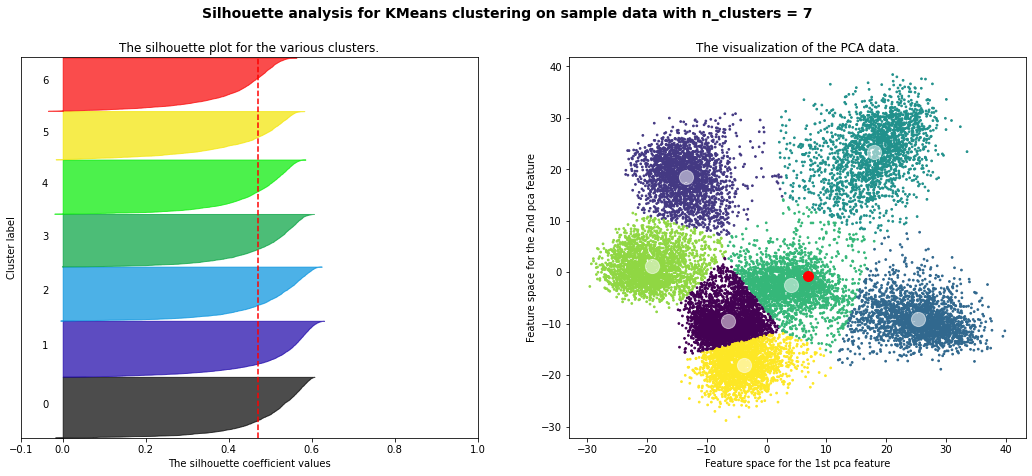

For n_clusters = 8 The average silhouette_score is : 0.441875
   label  silhouette_score
0      0          0.291823
1      1          0.490905
2      2          0.507715
3      3          0.476123
4      4          0.452794
5      5          0.433166
6      6          0.396754
7      7          0.404495
The patient Z lies in class 4
There are 2423 people in this class.


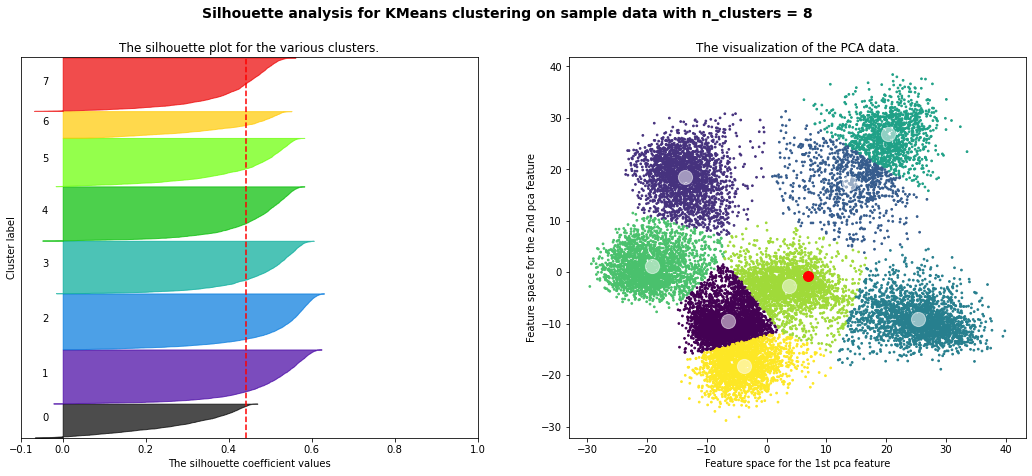

For n_clusters = 9 The average silhouette_score is : 0.39098203
   label  silhouette_score
0      0          0.305918
1      1          0.493421
2      2          0.315666
3      3          0.474424
4      4          0.437224
5      5          0.406495
6      6          0.392424
7      7          0.063037
8      8          0.370083
The patient Z lies in class 4
There are 2410 people in this class.


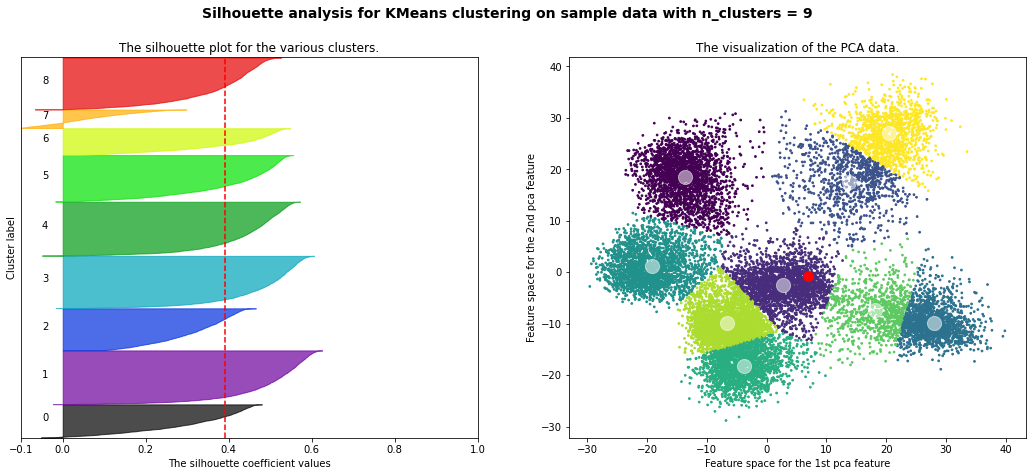

For n_clusters = 10 The average silhouette_score is : 0.34945586
   label  silhouette_score
0      0          0.305845
1      1          0.492206
2      2          0.306297
3      3          0.474593
4      4          0.194894
5      5          0.405803
6      6          0.392454
7      7          0.069137
8      8          0.369563
9      9          0.113693
The patient Z lies in class 4
There are 1208 people in this class.


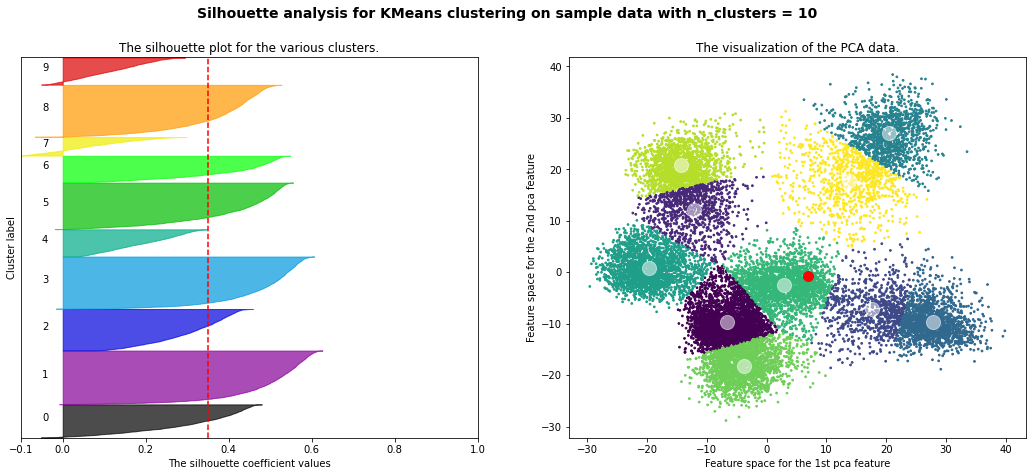

In [522]:
### Base of the result of Elbox method and Silhouette
# Only K = 6,7,8,9 are plotted out for further exploration

Klist = [6,7,8,9,10]

for n_clusters in Klist:
    
    #Initialize the plots
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 0.6])
    ax1.set_ylim([0, len(combined) + (n_clusters + 1) * 10])

    #Initialize the clusterer with n_clusters value
    clusterer_a = KMeans(n_clusters=n_clusters, random_state=10)
    KM = clusterer_a.fit(combined)
    cluster_labels = KM.predict(combined)
    cluster_centers = KM.cluster_centers_
    
    # Train the PCA dataset
    clusterer_b = KMeans(n_clusters=n_clusters, random_state=10)
    pca_km = clusterer_b.fit(combined_pca)
    pca_predict = pca_km.predict(combined_pca)

    # Again, compute the silhouette_score that gives the average value for all the samples.
    silhouette_avg = silhouette_score(combined, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Print out the average silhouette score for each class
    silhouette_class = silhouette_samples(combined, cluster_labels)
    result = pd.DataFrame({'label':cluster_labels, 'silhouette_score':silhouette_class})
    result = result.groupby(['label'], as_index=False).mean()
    print(result)
    
    # Print out the class where the patient Z lies in
    pt_class = KM.predict(pt.reshape(1,-1))[0]
    print("The patient Z lies in class", pt_class)
    print("There are %s people in this class." %(len(cluster_labels[cluster_labels==pt_class])-1))
    

    #To plot out the silhouette figure, compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(combined, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # The visualization of the PCA dataset
    ax2.scatter(combined_pca[:, 0], combined_pca[:, 1], c=pca_predict, s=3, cmap='viridis')
    ax2.scatter(combined_pca[-1, 0], combined_pca[-1, 1], c='red', s=100)
    centers = pca_km.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5)
    

    ax2.set_title("The visualization of the PCA data.")
    ax2.set_xlabel("Feature space for the 1st pca feature")
    ax2.set_ylabel("Feature space for the 2nd pca feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Final Model

In [524]:
# After the review of silhouette score
# K = 7 is chosen for the model performance

clusterer_c = KMeans(n_clusters=7, random_state=10)
KM_f = clusterer_c.fit(combined)
cluster_labels_f = KM_f.predict(combined)

pt_result = KM_f.predict(pt.reshape(1,-1))[0]

print("The patiect Z belongs to class", pt_result)
print("There are %s people in this class." %(len(cluster_labels_f[cluster_labels_f==pt_result])-1))

The patiect Z belongs to class 3
There are 2422 people in this class.


### Output to csv for kaggle competition

In [526]:
Id = list()
predicted = list()
for i in range(len(cluster_labels_f)):
    Id.append(i)
    if cluster_labels_f[i] ==3:
        predicted.append(1)
    else:
        predicted.append(0)
        

In [527]:
result = pd.DataFrame({'Id':Id, 'Predicted':predicted})
result.to_csv('patients_predict.csv', index=None)

In [528]:
result

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
16926,16926,0
16927,16927,1
16928,16928,0
16929,16929,0


### Feature investigation

In [539]:
result_array = np.asarray(predicted)
result_array = result_array.reshape(-1,1)

In [541]:
# Combine orginal dataset with the predictions
result_table = np.append(combined, result_array, axis=1)
result_table

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [547]:
# Seperate the dataset by z-class (where patient Z lies) and non-z-class
patientz = result_table[result_table[:,512]==1]
nonez = result_table[result_table[:, 512]!=1]

In [604]:
# Select the features that have significant mean differance between Z-class and non-Z-class
ilist = list()
z_mean = list()
nonz_mean = list()
for i in range(512):
    x1 = patientz[:,i]
    x2 = nonez[:,i]
    t_test = stats.ttest_ind(x1, x2)
    if t_test[1] <= 0.05:
        ilist.append(i)
        z_mean.append(round(np.mean(x1),3))
        nonz_mean.append(round(np.mean(x2),3))
        
# Print out the number of features, there are 300 features
print(len(ilist))

300


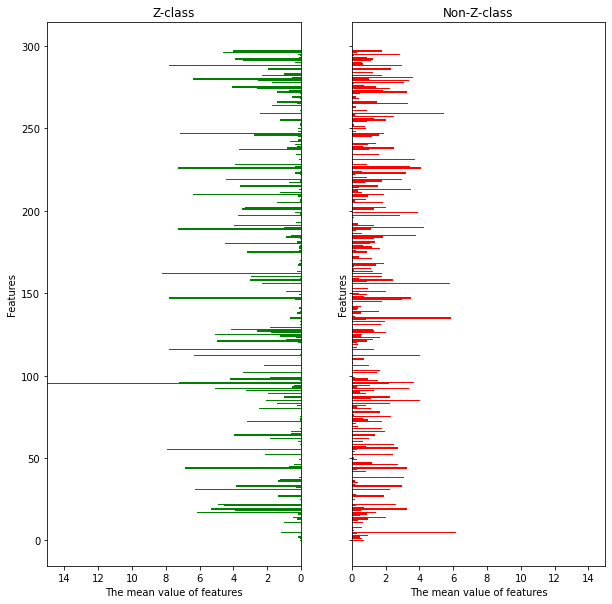

In [605]:
# Plotting out the distribution of the features whose mean values have significant difference between groups
y = range(300)
x1 = range(20)
x2 = range(20)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize = (10,10))
axes[0].barh(y, z_mean, align='center', color='green')
axes[1].barh(y, nonz_mean, align='center', color='red')
axes[0].invert_xaxis()

axes[0].set_xlim([15, 0])
axes[1].set_xlim([0, 15])

axes[0].set_title("Z-class")
axes[0].set_xlabel("The mean value of features")
axes[0].set_ylabel("Features")

axes[1].set_title("Non-Z-class")
axes[1].set_xlabel("The mean value of features")
axes[1].set_ylabel("Features")


plt.show()

In [602]:
# By plotting out the distribution of mean values, we found out that Z class has many features that have
# mean values that are bigger than 6, yet same thing is not founded in the Non-Z-class
# Filter out those features for potential future studies.
result_f = pd.DataFrame({'id':ilist, 'z':z_mean, 'non_z' : nonz_mean})
result_f[result_f['z']>=6]

,id,z,non_z
17,35,6.136,1.439
31,58,6.260,2.290
44,79,6.881,3.251
55,101,7.921,0.294
95,165,14.995,2.198
96,167,7.194,3.682
112,191,6.313,4.037
116,203,7.779,1.338
147,256,7.817,3.500
162,283,8.219,1.794
